In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # ignore warnings
from sklearn.preprocessing import OrdinalEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_csv('medical_clean.csv')

In [3]:
# Get summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [4]:
# Check for duplicates
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [5]:
# Check for missing values
df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [6]:
# Create variable and dataframe for dependent and independent variables

regression_col = ["Age", "Income", "Marital", "Children", "Gender", "Area", "Initial_admin", "Doc_visits", "Services", "TotalCharge", 
                "HighBlood", "VitD_levels", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", 
               "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma", "Initial_days"
]

regression_df = df[regression_col]

regression_df.head()


,Age,Income,Marital,Children,Gender,Area,Initial_admin,Doc_visits,Services,TotalCharge,...,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days
0,53,86575.93,Divorced,1,Male,Suburban,Emergency Admission,6,Blood Work,3726.702860,...,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,10.585770
1,51,46805.99,Married,3,Female,Urban,Emergency Admission,4,Intravenous,4193.190458,...,Yes,No,No,No,No,No,No,Yes,No,15.129562
2,53,14370.14,Widowed,3,Female,Suburban,Elective Admission,4,Blood Work,2434.234222,...,Yes,No,Yes,No,No,No,No,No,No,4.772177
3,78,39741.49,Married,0,Male,Suburban,Elective Admission,4,Blood Work,2127.830423,...,No,Yes,No,No,No,No,No,Yes,Yes,1.714879
4,22,1209.56,Widowed,1,Female,Rural,Elective Admission,5,CT Scan,2113.073274,...,No,No,No,Yes,No,No,Yes,No,No,1.254807


In [7]:
# Summary statistics for numeric variables
regression_df.describe()

,Age,Income,Children,Doc_visits,TotalCharge,VitD_levels,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,40490.495160,2.097200,5.012200,5312.172769,17.964262,34.455299
std,20.638538,28521.153293,2.163659,1.045734,2180.393838,2.017231,26.309341
min,18.000000,154.080000,0.000000,1.000000,1938.312067,9.806483,1.001981
25%,36.000000,19598.775000,0.000000,4.000000,3179.374015,16.626439,7.896215
50%,53.000000,33768.420000,1.000000,5.000000,5213.952000,17.951122,35.836244
75%,71.000000,54296.402500,3.000000,6.000000,7459.699750,19.347963,61.161020
max,89.000000,207249.100000,10.000000,9.000000,9180.728000,26.394449,71.981490


In [8]:
# Get value counts for "Marital"
df['Marital'].value_counts()

Marital
Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: count, dtype: int64

In [9]:
# Get value counts for "Gender"
df['Gender'].value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [10]:
# Get value counts for "Area"
df['Area'].value_counts()

Area
Rural       3369
Suburban    3328
Urban       3303
Name: count, dtype: int64

In [11]:
# Get value counts for "Initial_admin"
df['Initial_admin'].value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [12]:
# Get value counts for "Services"
df['Services'].value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [13]:
# Get value counts for "HighBlood"
df['HighBlood'].value_counts()

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64

In [14]:
# Get value counts for "Stroke"
df['Stroke'].value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [15]:
# Get value counts for "Complication_risk"
df['Complication_risk'].value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [16]:
# Get value counts for "Overweight"
df['Overweight'].value_counts()

Overweight
Yes    7094
No     2906
Name: count, dtype: int64

In [17]:
# Get value counts for "Arthritis"
df['Arthritis'].value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [18]:
# Get value counts for "Diabetes"
df['Diabetes'].value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [19]:
# Get value counts for "Hyperlipidemia"
df['Hyperlipidemia'].value_counts()

Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64

In [20]:
# Get value counts for "BackPain"
df['BackPain'].value_counts()

BackPain
No     5886
Yes    4114
Name: count, dtype: int64

In [21]:
# Get value counts for "Anxiety"
df['Anxiety'].value_counts()

Anxiety
No     6785
Yes    3215
Name: count, dtype: int64

In [22]:
# Get value counts for "Allergic_rhinitis"
df['Allergic_rhinitis'].value_counts()

Allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64

In [23]:
# Get value counts for "Reflux_esophagitis"
df['Reflux_esophagitis'].value_counts()

Reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64

In [24]:
# Get value counts for "Asthma"
df['Asthma'].value_counts()

Asthma
No     7107
Yes    2893
Name: count, dtype: int64

In [25]:
# Round "TotalCharge" and VitD_levels
df['TotalCharge'] = df['TotalCharge'].round(2)
df['VitD_levels'] = df['VitD_levels'].round(2)

In [26]:
# Re-express categorical variables for "HighBlood", "Stroke", "Overweight", "Arthritis", "Diabetes", 
# "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma", "ReAdmis," "Soft_drink"
yes_no_dict = {'No': 0, 'Yes': 1}
df['HighBlood'] = df['HighBlood'].replace(yes_no_dict).infer_objects(copy=False)
df['Stroke'] = df['Stroke'].replace(yes_no_dict).infer_objects(copy=False)
df['Overweight'] = df['Overweight'].replace(yes_no_dict).infer_objects(copy=False)
df['Arthritis'] = df['Arthritis'].replace(yes_no_dict).infer_objects(copy=False)
df['Diabetes'] = df['Diabetes'].replace(yes_no_dict).infer_objects(copy=False)
df['Hyperlipidemia'] = df['Hyperlipidemia'].replace(yes_no_dict).infer_objects(copy=False)
df['BackPain'] = df['BackPain'].replace(yes_no_dict).infer_objects(copy=False)
df['Anxiety'] = df['Anxiety'].replace(yes_no_dict).infer_objects(copy=False)
df['Allergic_rhinitis'] = df['Allergic_rhinitis'].replace(yes_no_dict).infer_objects(copy=False)
df['Reflux_esophagitis'] = df['Reflux_esophagitis'].replace(yes_no_dict).infer_objects(copy=False)
df['Asthma'] = df['Asthma'].replace(yes_no_dict).infer_objects(copy=False)
# Re-express other categorical variables
df["ReAdmis"] = df["ReAdmis"].replace(yes_no_dict).infer_objects(copy=False)
df["Soft_drink"] = df["Soft_drink"].replace(yes_no_dict).infer_objects(copy=False)

In [27]:
# Dummy variables for "Gender," "Area," "Initial_admin," "Services," "Marital"
df = df.join(pd.get_dummies(df['Gender'], prefix='Gender', drop_first=True))
df = df.join(pd.get_dummies(df['Area'], prefix='Area', drop_first=True))
df = df.join(pd.get_dummies(df['Initial_admin'], prefix='Initial_admin', drop_first=True))
df = df.join(pd.get_dummies(df['Services'], prefix='Services', drop_first=True))
df = df.join(pd.get_dummies(df['Marital'], prefix='Marital', drop_first=True))

# Replace spaces with '_'
df.columns = df.columns.str.replace(' ', '_')

In [28]:
# Convert dummy variables into 0/1
true_false_dict = {True: 1, False: 0}
df['Gender_Male'] = df['Gender_Male'].replace(true_false_dict).infer_objects(copy=False)
df['Gender_Nonbinary'] = df['Gender_Nonbinary'].replace(true_false_dict).infer_objects(copy=False)
df['Area_Suburban'] = df['Area_Suburban'].replace(true_false_dict).infer_objects(copy=False)
df['Area_Urban'] = df['Area_Urban'].replace(true_false_dict).infer_objects(copy=False)
df['Initial_admin_Emergency_Admission'] = df['Initial_admin_Emergency_Admission'].replace(true_false_dict).infer_objects(copy=False)
df['Initial_admin_Observation_Admission'] = df['Initial_admin_Observation_Admission'].replace(true_false_dict).infer_objects(copy=False)
df['Services_CT_Scan'] = df['Services_CT_Scan'].replace(true_false_dict).infer_objects(copy=False)
df['Services_Intravenous'] = df['Services_Intravenous'].replace(true_false_dict).infer_objects(copy=False)
df['Services_MRI'] = df['Services_MRI'].replace(true_false_dict).infer_objects(copy=False)
df['Marital_Married'] = df['Marital_Married'].replace(true_false_dict).infer_objects(copy=False)
df['Marital_Never_Married'] = df['Marital_Never_Married'].replace(true_false_dict).infer_objects(copy=False)
df['Marital_Separated'] = df['Marital_Separated'].replace(true_false_dict).infer_objects(copy=False)
df['Marital_Widowed'] = df['Marital_Widowed'].replace(true_false_dict).infer_objects(copy=False)

In [29]:
# Ordinal encoding for "Complication_risk"
# Code adapted from GeeksforGeeks:
# GeeksforGeeks. (n.d.). How to perform ordinal encoding using sklearn. Retrieved December 10, 2024, from https://www.geeksforgeeks.org/how-to-perform-ordinal-encoding-using-sklearn/

# Initialize and fit encoder
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
df['Complication_risk'] = encoder.fit_transform(df[['Complication_risk']])

# Convert values to integer
df['Complication_risk'] = df['Complication_risk'].astype(int)

# Print result
print(df[['Complication_risk']])

      Complication_risk
0                     1
1                     2
2                     1
3                     1
4                     0
...                 ...
9995                  1
9996                  1
9997                  2
9998                  1
9999                  0

[10000 rows x 1 columns]


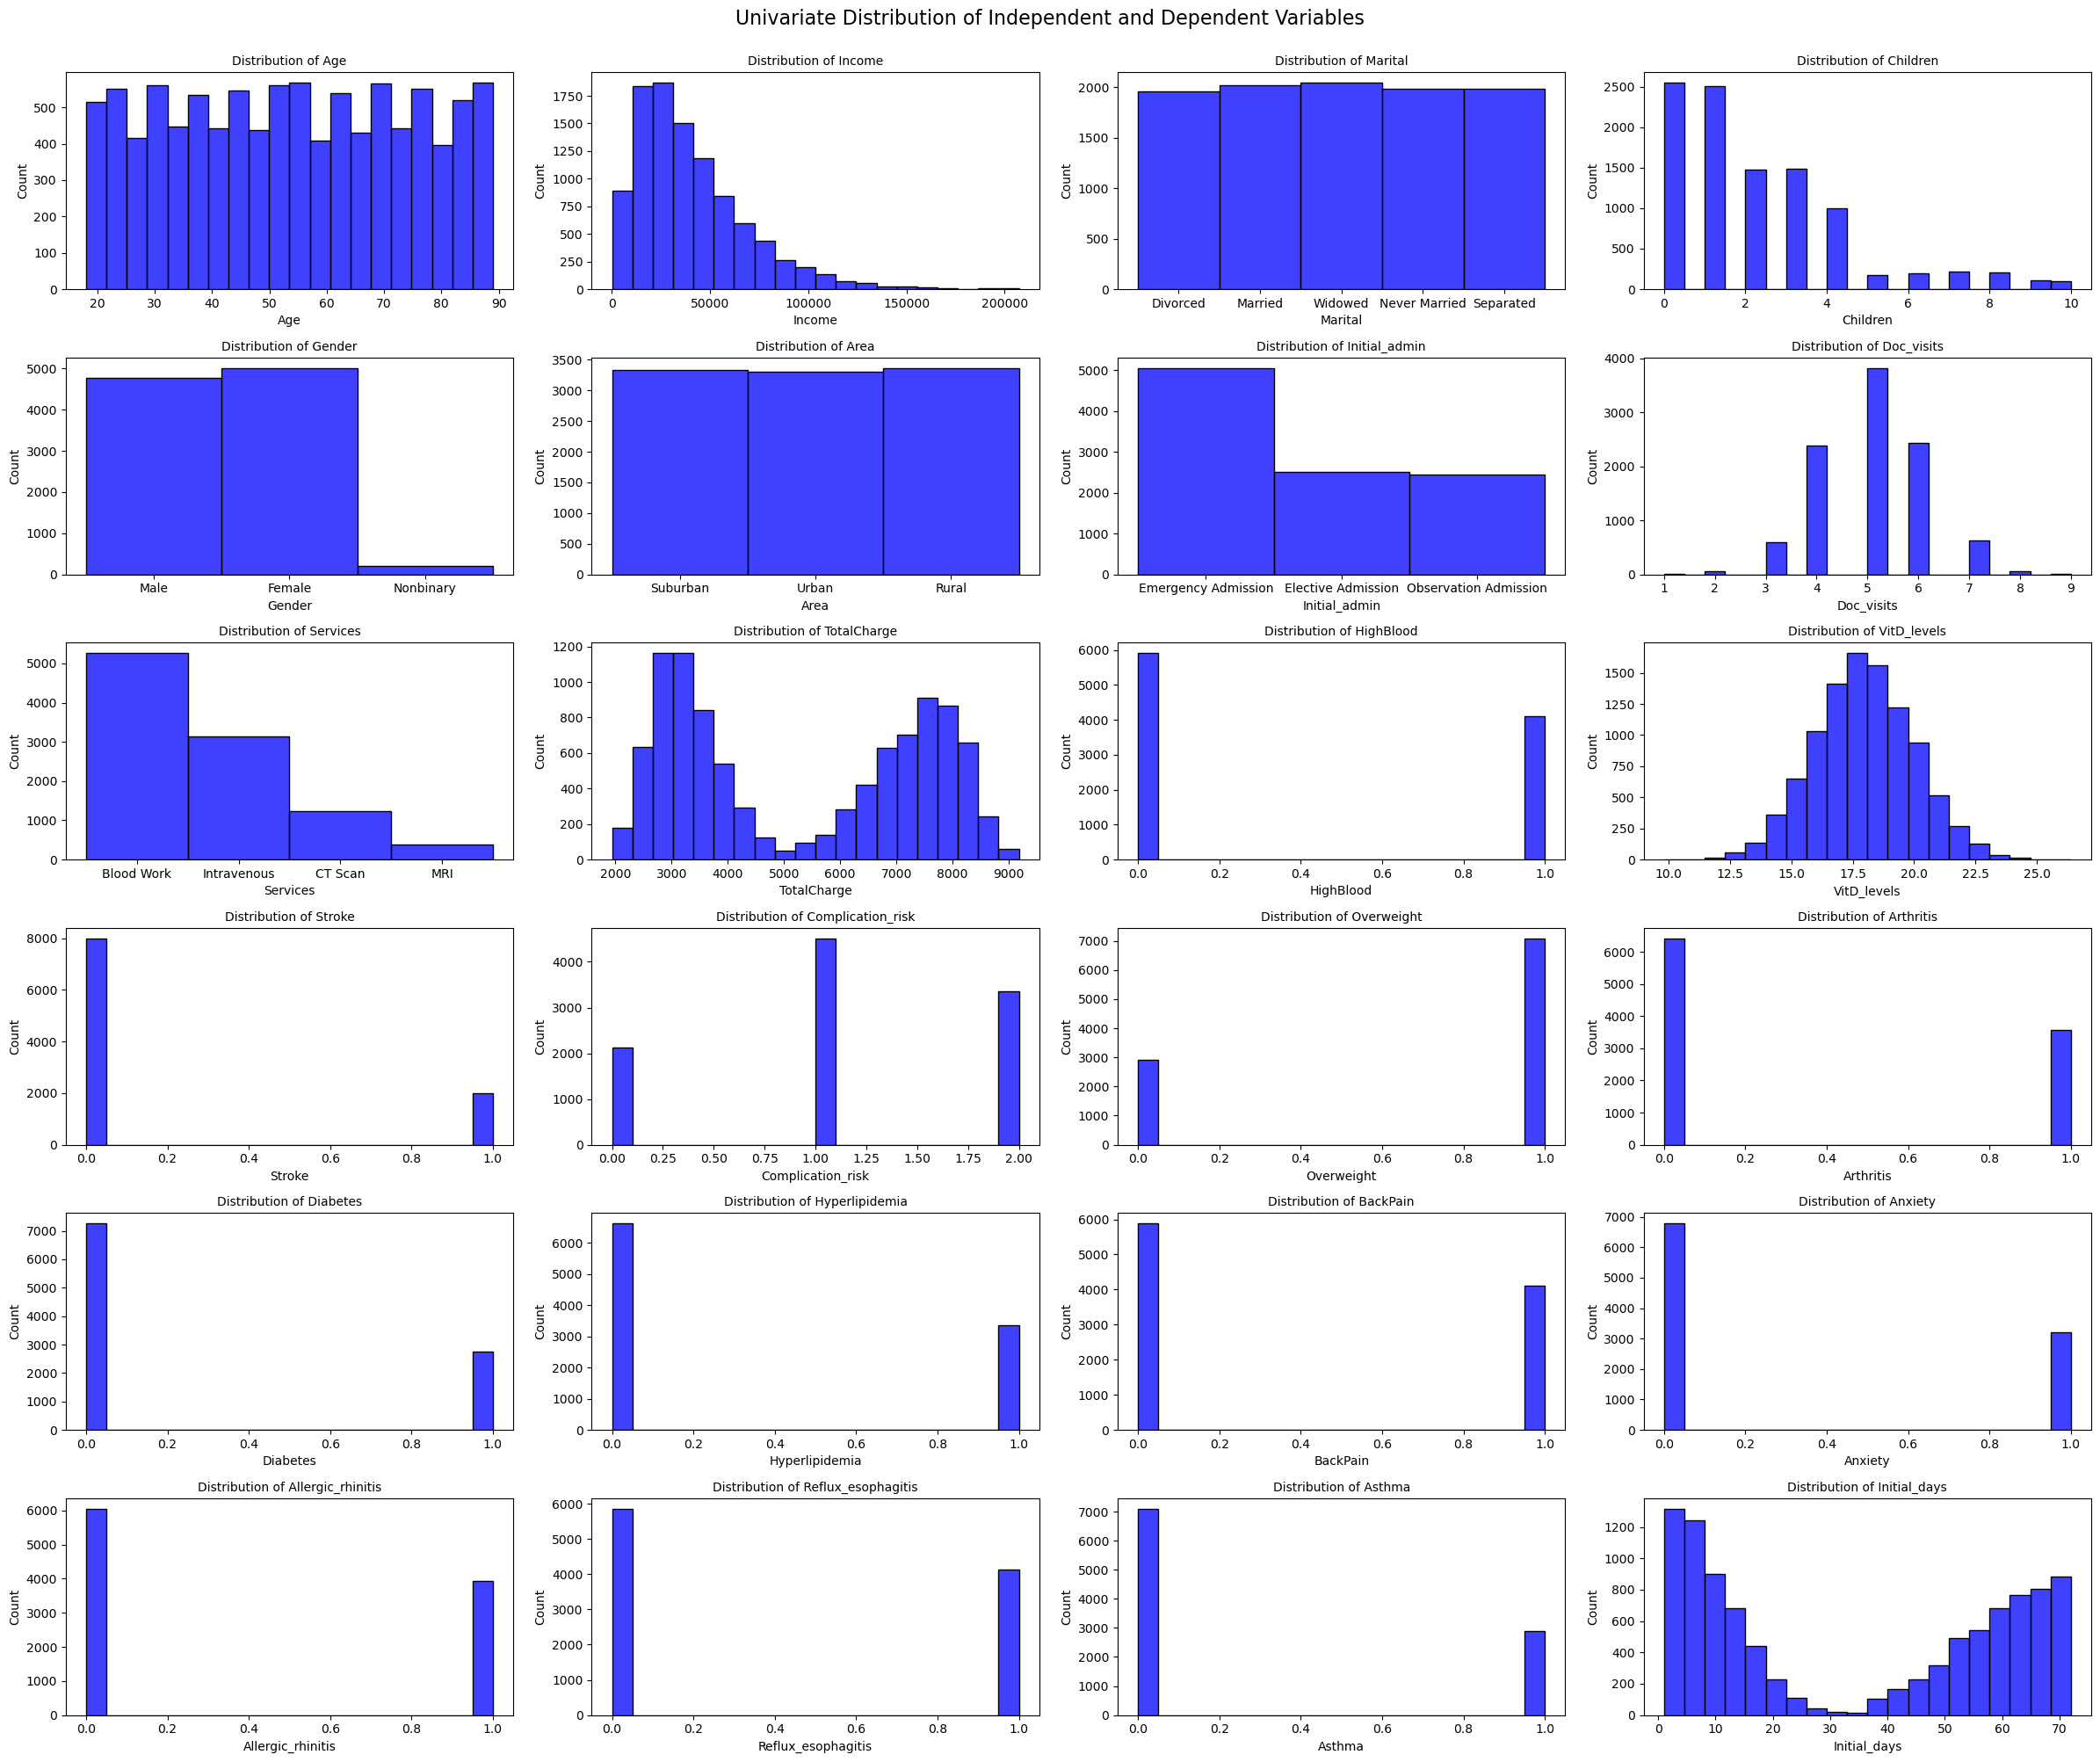

In [30]:
# Create histograms

# Creating a grid layout for the histograms
num_cols = 4  # Number of plots per row
num_rows = math.ceil(len(regression_col) / num_cols)  # Calculate required rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 20))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Add spacing between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each predictor variable and plot the histogram
for i, col in enumerate(regression_col):
    sns.histplot(df[col], bins=20, kde=False, ax=axes[i], color='blue')  # Histogram
    axes[i].set_title(f"Distribution of {col}", fontsize=10)  # Title
    axes[i].set_xlabel(col)  # X-axis label
    axes[i].set_ylabel("Count")  # Y-axis label

# Remove unused subplots
for j in range(len(regression_col), len(axes)):
    fig.delaxes(axes[j])  # Remove extra axes

plt.suptitle("Univariate Distribution of Independent and Dependent Variables", fontsize=16, y=1)
plt.tight_layout()

# Show the plot
plt.show()

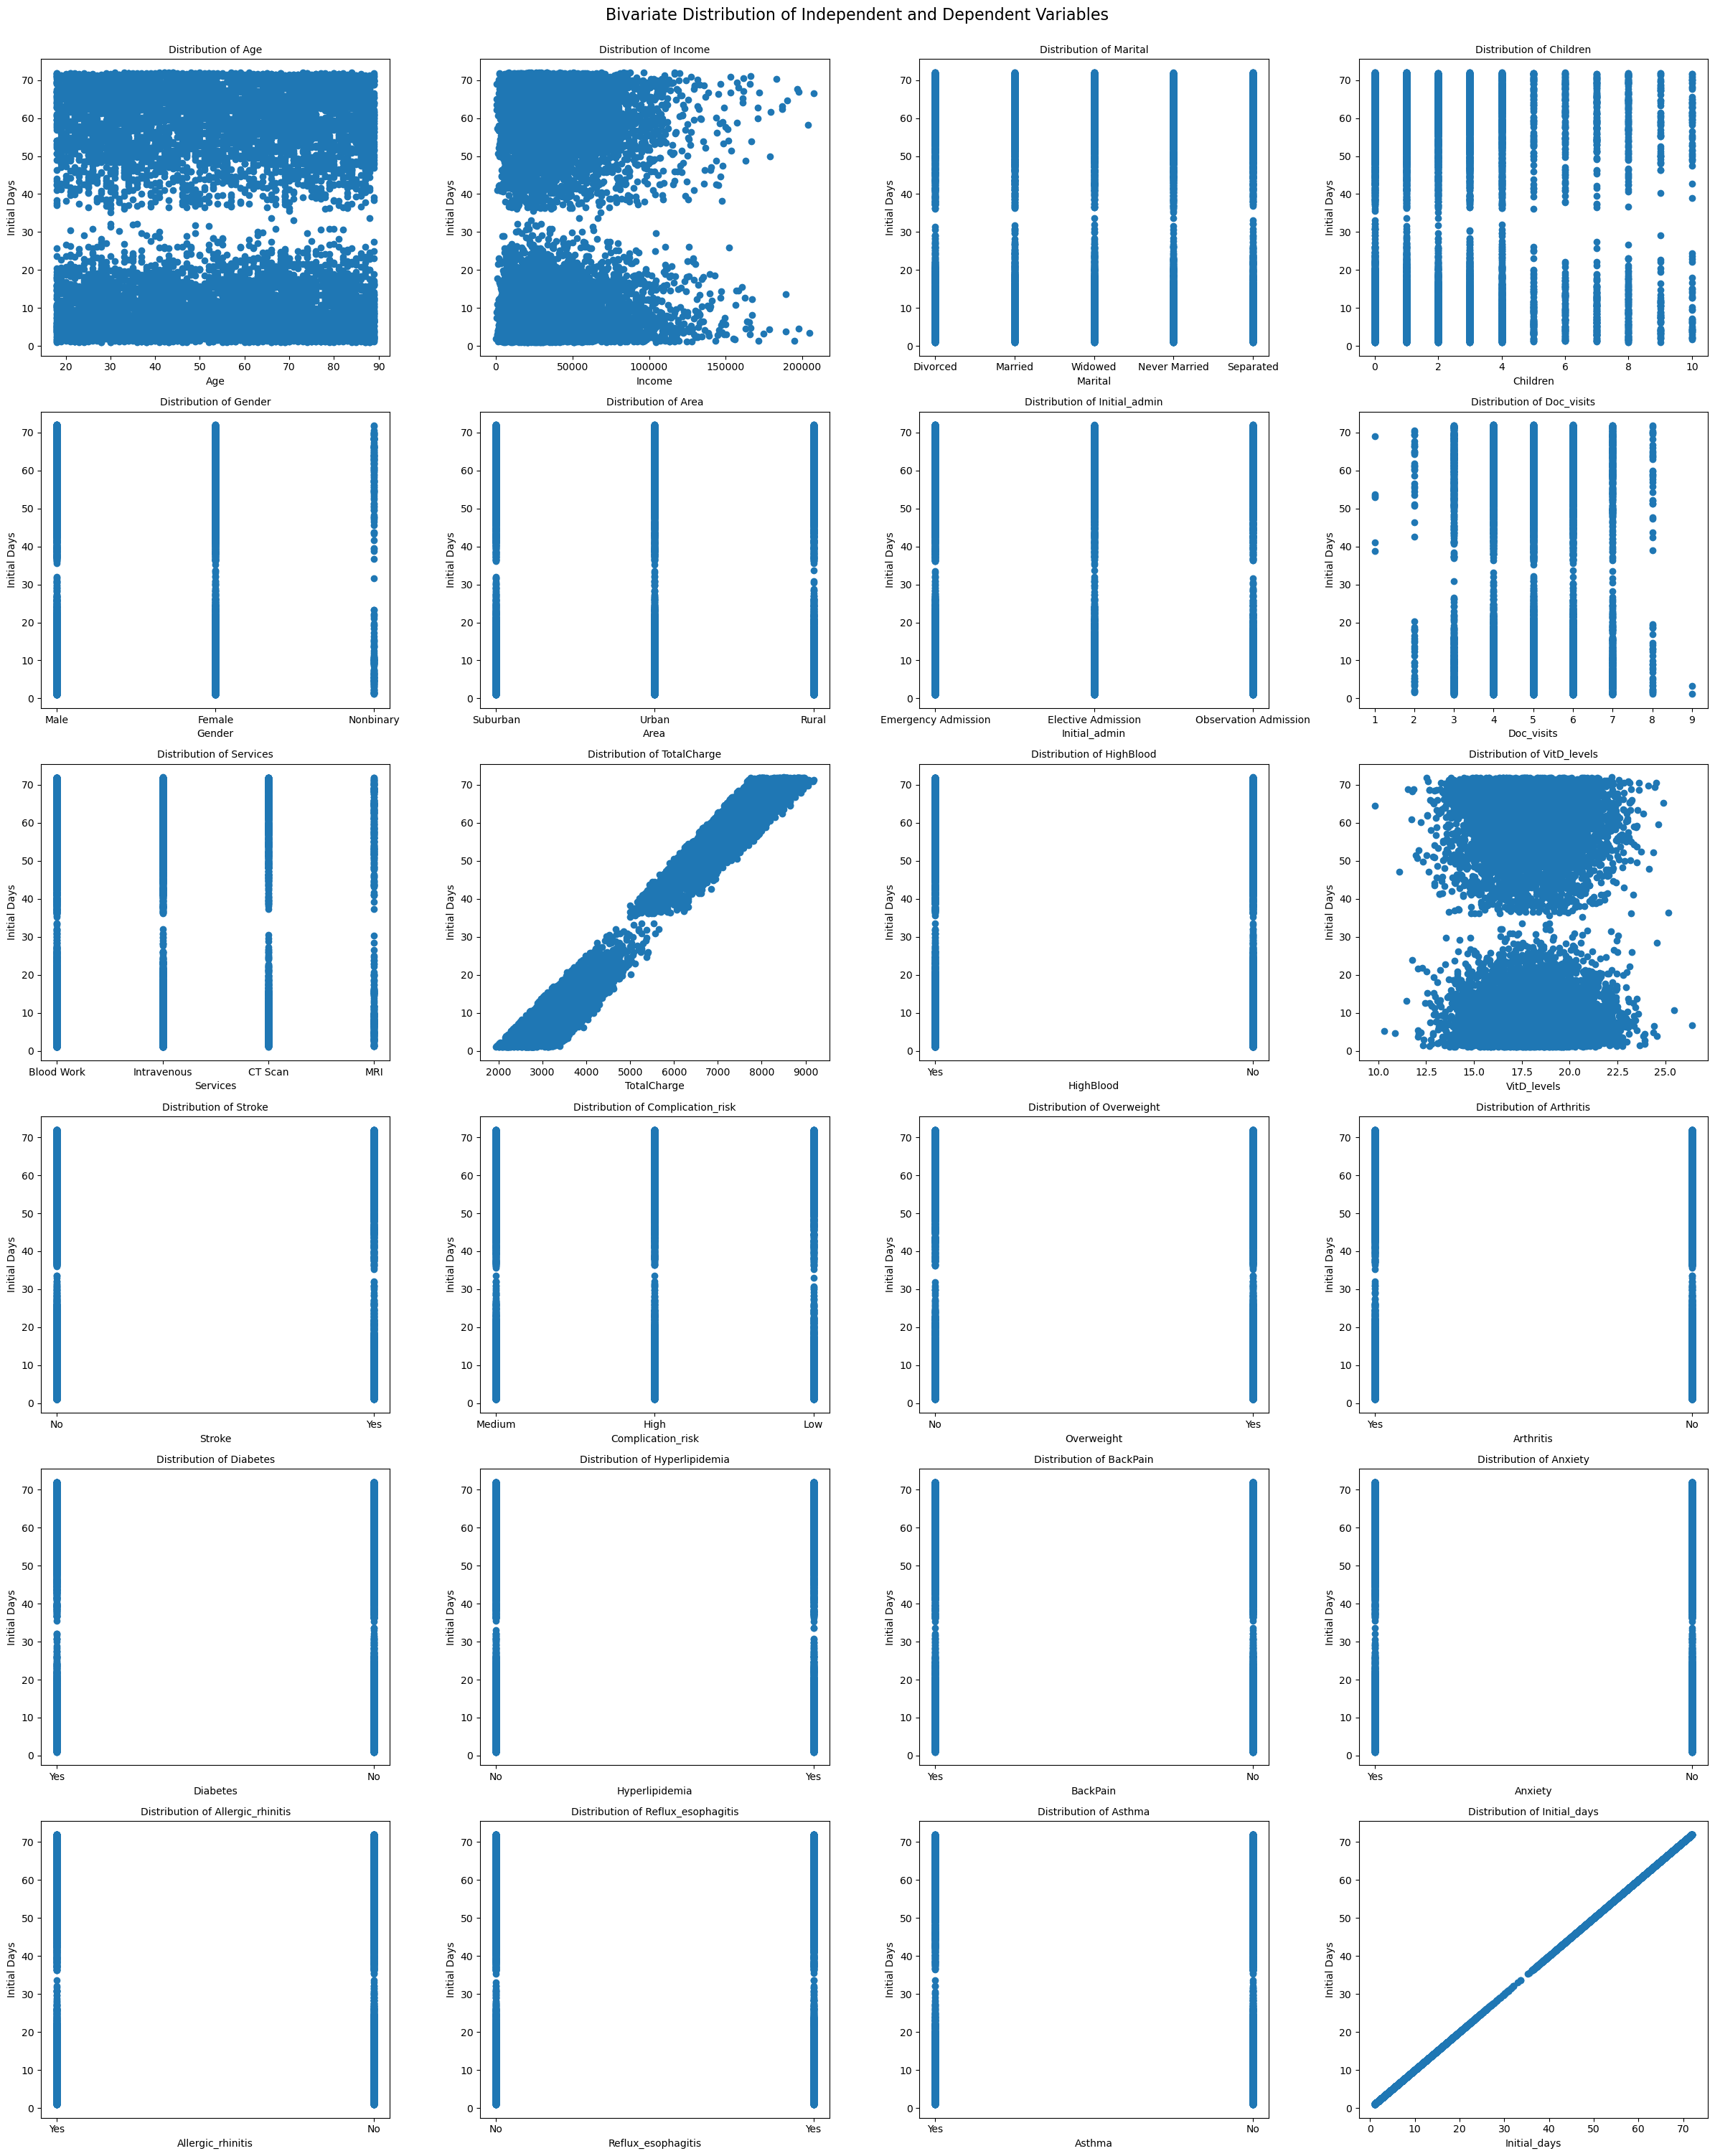

In [31]:
# Create scatterplots

# Creating a grid layout for the histograms
num_cols = 4  # Number of plots per row
num_rows = math.ceil(len(regression_df.columns) / num_cols)  # Calculate required rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(24, 30))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Add spacing between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each predictor variable and plot the histogram
for i, col in enumerate(regression_df.columns):
  # Scatter plot with blue color
  axes[i].scatter(regression_df[col], df["Initial_days"])  # Assuming 'regression_col' holds pairs of column names
  axes[i].set_title(f"Distribution of {col}", fontsize=10)  # Title
  axes[i].set_xlabel(col)  # X-axis label
  axes[i].set_ylabel("Initial Days")  # Y-axis label

# Remove unused subplots
for j in range(len(regression_df.columns), len(axes)):
    fig.delaxes(axes[j])  # Remove extra axes

plt.suptitle("Bivariate Distribution of Independent and Dependent Variables", fontsize=16, y=1)
plt.tight_layout()

# Show the plot
plt.show()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 63 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CaseOrder                            10000 non-null  int64  
 1   Customer_id                          10000 non-null  object 
 2   Interaction                          10000 non-null  object 
 3   UID                                  10000 non-null  object 
 4   City                                 10000 non-null  object 
 5   State                                10000 non-null  object 
 6   County                               10000 non-null  object 
 7   Zip                                  10000 non-null  int64  
 8   Lat                                  10000 non-null  float64
 9   Lng                                  10000 non-null  float64
 10  Population                           10000 non-null  int64  
 11  Area                         

In [33]:
# Drop irrelevant columns

df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population',
                      'TimeZone', 'Job','ReAdmis', 'Full_meals_eaten', 'vitD_supp', 'Soft_drink', 'Additional_charges', 'Item1', 'Item2',
                      'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 37 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Area                                 10000 non-null  object 
 1   Children                             10000 non-null  int64  
 2   Age                                  10000 non-null  int64  
 3   Income                               10000 non-null  float64
 4   Marital                              10000 non-null  object 
 5   Gender                               10000 non-null  object 
 6   VitD_levels                          10000 non-null  float64
 7   Doc_visits                           10000 non-null  int64  
 8   Initial_admin                        10000 non-null  object 
 9   HighBlood                            10000 non-null  int64  
 10  Stroke                               10000 non-null  int64  
 11  Complication_risk            

In [35]:
# Start initial multiple linear regression model 


# Set up your independent and dependent variables
X = df[["Age", "Income", "Marital_Married", "Marital_Never_Married", "Marital_Separated", "Marital_Widowed", "Gender_Male", "Gender_Nonbinary",
        "Area_Suburban", "Area_Urban", "TotalCharge", "Children", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", 
        "Doc_visits", "Services_CT_Scan", "Services_Intravenous", "Services_MRI", "HighBlood", "Stroke", "Complication_risk", "Overweight", "Arthritis", "Diabetes", 
        "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "VitD_levels", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
initial_model = sm.OLS(y, X).fit()

# Print the model summary
print(initial_model.summary())


                               Variable        VIF
0                                   Age   7.414393
1                                Income   2.972303
2                       Marital_Married   2.002355
3                 Marital_Never_Married   1.975333
4                     Marital_Separated   1.975439
5                       Marital_Widowed   2.008886
6                           Gender_Male   1.934757
7                      Gender_Nonbinary   1.045707
8                         Area_Suburban   1.977834
9                            Area_Urban   1.977721
10                          TotalCharge   6.871342
11                             Children   1.936926
12    Initial_admin_Emergency_Admission   3.018355
13  Initial_admin_Observation_Admission   1.953101
14                           Doc_visits  20.240376
15                     Services_CT_Scan   1.233710
16                 Services_Intravenous   1.589342
17                         Services_MRI   1.072562
18                            H

In [36]:
# Remove "VitD_levels" with VIF value of 34.546984 and p-value of 0.271 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Age", "Income", "Marital_Married", "Marital_Never_Married", "Marital_Separated", "Marital_Widowed", "Gender_Male", "Gender_Nonbinary",
        "Area_Suburban", "Area_Urban", "TotalCharge", "Children", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", 
        "Doc_visits", "Services_CT_Scan", "Services_Intravenous", "Services_MRI", "HighBlood", "Stroke", "Complication_risk", "Overweight", 
        "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable        VIF
0                                   Age   6.902773
1                                Income   2.919162
2                       Marital_Married   1.955396
3                 Marital_Never_Married   1.922662
4                     Marital_Separated   1.922430
5                       Marital_Widowed   1.959924
6                           Gender_Male   1.914202
7                      Gender_Nonbinary   1.044617
8                         Area_Suburban   1.952489
9                            Area_Urban   1.941257
10                          TotalCharge   6.585008
11                             Children   1.918612
12    Initial_admin_Emergency_Admission   2.941608
13  Initial_admin_Observation_Admission   1.915410
14                           Doc_visits  14.805456
15                     Services_CT_Scan   1.230288
16                 Services_Intravenous   1.577437
17                         Services_MRI   1.071302
18                            H

In [37]:
# Remove "Doc_visits" with VIF value of 14.805456 and p-value of 0.491 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Age", "Income", "Marital_Married", "Marital_Never_Married", "Marital_Separated", "Marital_Widowed", "Gender_Male", "Gender_Nonbinary",
        "Area_Suburban", "Area_Urban", "TotalCharge", "Children", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", 
         "Services_CT_Scan", "Services_Intravenous", "Services_MRI", "HighBlood", "Stroke", "Complication_risk", "Overweight", 
        "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                   Age  6.335914
1                                Income  2.836570
2                       Marital_Married  1.910406
3                 Marital_Never_Married  1.874517
4                     Marital_Separated  1.870596
5                       Marital_Widowed  1.910568
6                           Gender_Male  1.891076
7                      Gender_Nonbinary  1.043836
8                         Area_Suburban  1.920072
9                            Area_Urban  1.913063
10                          TotalCharge  6.286051
11                             Children  1.902539
12    Initial_admin_Emergency_Admission  2.852128
13  Initial_admin_Observation_Admission  1.857556
14                     Services_CT_Scan  1.225114
15                 Services_Intravenous  1.566901
16                         Services_MRI  1.070506
17                            HighBlood  1.677375
18                               Stroke  1.241343


In [38]:
# Remove "Gender_Nonbinary" with p-value of 0.980 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Age", "Income", "Marital_Married", "Marital_Never_Married", "Marital_Separated", "Marital_Widowed", "Gender_Male",
        "Area_Suburban", "Area_Urban", "TotalCharge", "Children", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", 
         "Services_CT_Scan", "Services_Intravenous", "Services_MRI", "HighBlood", "Stroke", "Complication_risk", "Overweight", 
        "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                   Age  6.332795
1                                Income  2.835991
2                       Marital_Married  1.910048
3                 Marital_Never_Married  1.874229
4                     Marital_Separated  1.870585
5                       Marital_Widowed  1.910527
6                           Gender_Male  1.856301
7                         Area_Suburban  1.919731
8                            Area_Urban  1.912264
9                           TotalCharge  6.282818
10                             Children  1.902502
11    Initial_admin_Emergency_Admission  2.852030
12  Initial_admin_Observation_Admission  1.857519
13                     Services_CT_Scan  1.225099
14                 Services_Intravenous  1.566797
15                         Services_MRI  1.069953
16                            HighBlood  1.676680
17                               Stroke  1.241274
18                    Complication_risk  3.192365


In [39]:
# Remove "Marital_Widowed" with p-value of 0.823 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Age", "Income", "Marital_Married", "Marital_Never_Married", "Marital_Separated", "Gender_Male",
        "Area_Suburban", "Area_Urban", "TotalCharge", "Children", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", 
         "Services_CT_Scan", "Services_Intravenous", "Services_MRI", "HighBlood", "Stroke", "Complication_risk", "Overweight", 
        "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                   Age  6.224059
1                                Income  2.827437
2                       Marital_Married  1.480628
3                 Marital_Never_Married  1.459252
4                     Marital_Separated  1.457978
5                           Gender_Male  1.851777
6                         Area_Suburban  1.916518
7                            Area_Urban  1.906507
8                           TotalCharge  6.191979
9                              Children  1.901121
10    Initial_admin_Emergency_Admission  2.834054
11  Initial_admin_Observation_Admission  1.846770
12                     Services_CT_Scan  1.224790
13                 Services_Intravenous  1.561726
14                         Services_MRI  1.069258
15                            HighBlood  1.676393
16                               Stroke  1.241158
17                    Complication_risk  3.176529
18                           Overweight  3.174517


In [40]:
# Remove "Stroke" with p-value of 0.894 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Age", "Income", "Marital_Married", "Marital_Never_Married", "Marital_Separated", "Gender_Male",
        "Area_Suburban", "Area_Urban", "TotalCharge", "Children", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", 
         "Services_CT_Scan", "Services_Intravenous", "Services_MRI", "HighBlood", "Complication_risk", "Overweight", 
        "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                   Age  6.203040
1                                Income  2.825531
2                       Marital_Married  1.480501
3                 Marital_Never_Married  1.459050
4                     Marital_Separated  1.457389
5                           Gender_Male  1.851492
6                         Area_Suburban  1.916156
7                            Area_Urban  1.905794
8                           TotalCharge  6.185736
9                              Children  1.900412
10    Initial_admin_Emergency_Admission  2.833223
11  Initial_admin_Observation_Admission  1.845699
12                     Services_CT_Scan  1.224471
13                 Services_Intravenous  1.561696
14                         Services_MRI  1.069258
15                            HighBlood  1.675871
16                    Complication_risk  3.174708
17                           Overweight  3.172501
18                            Arthritis  1.543997


In [41]:
# Remove "Marital_Never_Married" with p-value of 0.857 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Age", "Income", "Marital_Married", "Marital_Separated", "Gender_Male", "Area_Suburban", "Area_Urban", "TotalCharge", 
        "Children", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "Services_CT_Scan", 
        "Services_Intravenous", "Services_MRI", "HighBlood", "Complication_risk", "Overweight", "Arthritis", "Diabetes", 
        "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                   Age  6.177562
1                                Income  2.818036
2                       Marital_Married  1.331768
3                     Marital_Separated  1.314501
4                           Gender_Male  1.848809
5                         Area_Suburban  1.915102
6                            Area_Urban  1.904308
7                           TotalCharge  6.148822
8                              Children  1.900236
9     Initial_admin_Emergency_Admission  2.831376
10  Initial_admin_Observation_Admission  1.843980
11                     Services_CT_Scan  1.224380
12                 Services_Intravenous  1.561182
13                         Services_MRI  1.069206
14                            HighBlood  1.675676
15                    Complication_risk  3.165903
16                           Overweight  3.160891
17                            Arthritis  1.541676
18                             Diabetes  1.365934


In [42]:
# Remove "Area_Urban" with p-value of 0.813 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Age", "Income", "Marital_Married", "Marital_Separated", "Gender_Male", "Area_Suburban", "TotalCharge", 
        "Children", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "Services_CT_Scan", 
        "Services_Intravenous", "Services_MRI", "HighBlood", "Complication_risk", "Overweight", "Arthritis", "Diabetes", 
        "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                   Age  6.120928
1                                Income  2.805702
2                       Marital_Married  1.331012
3                     Marital_Separated  1.313932
4                           Gender_Male  1.846838
5                         Area_Suburban  1.482879
6                           TotalCharge  6.092709
7                              Children  1.898801
8     Initial_admin_Emergency_Admission  2.816292
9   Initial_admin_Observation_Admission  1.834342
10                     Services_CT_Scan  1.224130
11                 Services_Intravenous  1.559208
12                         Services_MRI  1.069185
13                            HighBlood  1.673317
14                    Complication_risk  3.157718
15                           Overweight  3.150544
16                            Arthritis  1.541140
17                             Diabetes  1.365933
18                       Hyperlipidemia  1.489778


In [43]:
# Remove "Services_Intravenous" with p-value of 0.742 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Age", "Income", "Marital_Married", "Marital_Separated", "Gender_Male", "Area_Suburban", "TotalCharge", 
        "Children", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "Services_CT_Scan", 
        "Services_MRI", "HighBlood", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", 
        "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                   Age  6.071288
1                                Income  2.799136
2                       Marital_Married  1.330984
3                     Marital_Separated  1.313923
4                           Gender_Male  1.846068
5                         Area_Suburban  1.481618
6                           TotalCharge  6.077563
7                              Children  1.896426
8     Initial_admin_Emergency_Admission  2.809657
9   Initial_admin_Observation_Admission  1.829986
10                     Services_CT_Scan  1.144948
11                         Services_MRI  1.044896
12                            HighBlood  1.673020
13                    Complication_risk  3.151143
14                           Overweight  3.141695
15                            Arthritis  1.540704
16                             Diabetes  1.365043
17                       Hyperlipidemia  1.489467
18                             BackPain  1.684647


In [44]:
# Remove "Children" with p-value of 0.673 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Age", "Income", "Marital_Married", "Marital_Separated", "Gender_Male", "Area_Suburban", "TotalCharge", 
        "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "Services_CT_Scan", 
        "Services_MRI", "HighBlood", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", 
        "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                   Age  6.016704
1                                Income  2.791062
2                       Marital_Married  1.329514
3                     Marital_Separated  1.313739
4                           Gender_Male  1.844747
5                         Area_Suburban  1.479376
6                           TotalCharge  6.027632
7     Initial_admin_Emergency_Admission  2.802113
8   Initial_admin_Observation_Admission  1.826402
9                      Services_CT_Scan  1.144844
10                         Services_MRI  1.044896
11                            HighBlood  1.672314
12                    Complication_risk  3.144444
13                           Overweight  3.137487
14                            Arthritis  1.539733
15                             Diabetes  1.362841
16                       Hyperlipidemia  1.489092
17                             BackPain  1.684490
18                              Anxiety  1.458540


In [45]:
# Remove "Marital_Separated" with p-value of 0.660 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Age", "Income", "Marital_Married", "Gender_Male", "Area_Suburban", "TotalCharge", 
        "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "Services_CT_Scan", 
        "Services_MRI", "HighBlood", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", 
        "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                   Age  5.989723
1                                Income  2.788982
2                       Marital_Married  1.251900
3                           Gender_Male  1.844172
4                         Area_Suburban  1.479206
5                           TotalCharge  6.005145
6     Initial_admin_Emergency_Admission  2.798666
7   Initial_admin_Observation_Admission  1.824116
8                      Services_CT_Scan  1.144723
9                          Services_MRI  1.044887
10                            HighBlood  1.671885
11                    Complication_risk  3.143617
12                           Overweight  3.134253
13                            Arthritis  1.538620
14                             Diabetes  1.361983
15                       Hyperlipidemia  1.489081
16                             BackPain  1.683650
17                              Anxiety  1.457652
18                    Allergic_rhinitis  1.620713


In [46]:
# Remove "Age" with p-value of 0.641 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Income", "Marital_Married", "Gender_Male", "Area_Suburban", "TotalCharge", 
        "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "Services_CT_Scan", 
        "Services_MRI", "HighBlood", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", 
        "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis", "Asthma"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                Income  2.732328
1                       Marital_Married  1.248239
2                           Gender_Male  1.830114
3                         Area_Suburban  1.467812
4                           TotalCharge  5.630671
5     Initial_admin_Emergency_Admission  2.739359
6   Initial_admin_Observation_Admission  1.787507
7                      Services_CT_Scan  1.142768
8                          Services_MRI  1.043851
9                             HighBlood  1.662911
10                    Complication_risk  3.070010
11                           Overweight  3.053521
12                            Arthritis  1.530357
13                             Diabetes  1.356176
14                       Hyperlipidemia  1.481460
15                             BackPain  1.670373
16                              Anxiety  1.450932
17                    Allergic_rhinitis  1.607705
18                   Reflux_esophagitis  1.661699


In [47]:
# Remove "Asthma" with p-value of 0.623 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Income", "Marital_Married", "Gender_Male", "Area_Suburban", "TotalCharge", 
        "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "Services_CT_Scan", 
        "Services_MRI", "HighBlood", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", 
        "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                Income  2.725262
1                       Marital_Married  1.248105
2                           Gender_Male  1.827961
3                         Area_Suburban  1.467810
4                           TotalCharge  5.614654
5     Initial_admin_Emergency_Admission  2.734684
6   Initial_admin_Observation_Admission  1.784298
7                      Services_CT_Scan  1.142150
8                          Services_MRI  1.043807
9                             HighBlood  1.661816
10                    Complication_risk  3.066242
11                           Overweight  3.041085
12                            Arthritis  1.530100
13                             Diabetes  1.354444
14                       Hyperlipidemia  1.481298
15                             BackPain  1.668289
16                              Anxiety  1.449571
17                    Allergic_rhinitis  1.606522
18                   Reflux_esophagitis  1.660888


In [48]:
# Remove "Marital_Married" with p-value of 0.556 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Income", "Gender_Male", "Area_Suburban", "TotalCharge", 
        "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", "Services_CT_Scan", 
        "Services_MRI", "HighBlood", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", 
        "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                Income  2.724361
1                           Gender_Male  1.825412
2                         Area_Suburban  1.467010
3                           TotalCharge  5.603008
4     Initial_admin_Emergency_Admission  2.730241
5   Initial_admin_Observation_Admission  1.783120
6                      Services_CT_Scan  1.142096
7                          Services_MRI  1.043505
8                             HighBlood  1.659561
9                     Complication_risk  3.061879
10                           Overweight  3.037378
11                            Arthritis  1.528201
12                             Diabetes  1.354444
13                       Hyperlipidemia  1.481291
14                             BackPain  1.663651
15                              Anxiety  1.449138
16                    Allergic_rhinitis  1.605680
17                   Reflux_esophagitis  1.660881
                            OLS Regression Results

In [49]:
# Remove "Services_CT_Scan" with p-value of 0.471 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Income", "Gender_Male", "Area_Suburban", "TotalCharge", "Initial_admin_Emergency_Admission",
        "Initial_admin_Observation_Admission", "Services_MRI", "HighBlood", "Complication_risk", 
        "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", 
        "Reflux_esophagitis"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                                Income  2.723684
1                           Gender_Male  1.825319
2                         Area_Suburban  1.466906
3                           TotalCharge  5.591047
4     Initial_admin_Emergency_Admission  2.729195
5   Initial_admin_Observation_Admission  1.783090
6                          Services_MRI  1.038184
7                             HighBlood  1.658723
8                     Complication_risk  3.057543
9                            Overweight  3.034921
10                            Arthritis  1.528024
11                             Diabetes  1.353540
12                       Hyperlipidemia  1.481125
13                             BackPain  1.662300
14                              Anxiety  1.449123
15                    Allergic_rhinitis  1.605113
16                   Reflux_esophagitis  1.659397
                            OLS Regression Results                            
Dep. Variable:       

In [50]:
# Remove "Income" with p-value of 0.405 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Gender_Male", "Area_Suburban", "TotalCharge", "Initial_admin_Emergency_Admission",
        "Initial_admin_Observation_Admission", "Services_MRI", "HighBlood", "Complication_risk", 
        "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", 
        "Reflux_esophagitis"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                           Gender_Male  1.814645
1                         Area_Suburban  1.462810
2                           TotalCharge  5.455755
3     Initial_admin_Emergency_Admission  2.701198
4   Initial_admin_Observation_Admission  1.756617
5                          Services_MRI  1.038001
6                             HighBlood  1.654839
7                     Complication_risk  3.022006
8                            Overweight  3.004337
9                             Arthritis  1.525280
10                             Diabetes  1.351914
11                       Hyperlipidemia  1.476368
12                             BackPain  1.655638
13                              Anxiety  1.446125
14                    Allergic_rhinitis  1.599954
15                   Reflux_esophagitis  1.650145
                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                     

In [51]:
# Remove "Gender_Male" with p-value of 0.368 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Area_Suburban", "TotalCharge", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", 
        "Services_MRI", "HighBlood", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", 
        "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                         Area_Suburban  1.461463
1                           TotalCharge  5.355003
2     Initial_admin_Emergency_Admission  2.692106
3   Initial_admin_Observation_Admission  1.751054
4                          Services_MRI  1.037999
5                             HighBlood  1.651952
6                     Complication_risk  3.002756
7                            Overweight  2.981711
8                             Arthritis  1.522387
9                              Diabetes  1.350626
10                       Hyperlipidemia  1.472573
11                             BackPain  1.654638
12                              Anxiety  1.445154
13                    Allergic_rhinitis  1.597254
14                   Reflux_esophagitis  1.648884
                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Ad

In [52]:
# Remove "Services_MRI" with p-value of 0.272 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["Area_Suburban", "TotalCharge", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", 
        "HighBlood", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", 
        "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                         Area_Suburban  1.461415
1                           TotalCharge  5.348366
2     Initial_admin_Emergency_Admission  2.690960
3   Initial_admin_Observation_Admission  1.750875
4                             HighBlood  1.651792
5                     Complication_risk  3.002734
6                            Overweight  2.980974
7                             Arthritis  1.522376
8                              Diabetes  1.349734
9                        Hyperlipidemia  1.472542
10                             BackPain  1.654541
11                              Anxiety  1.445153
12                    Allergic_rhinitis  1.597136
13                   Reflux_esophagitis  1.648689
                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:      

In [53]:
# Remove "Area_Suburban" with p-value of 0.123 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["TotalCharge", "Initial_admin_Emergency_Admission", "Initial_admin_Observation_Admission", 
        "HighBlood", "Complication_risk", "Overweight", "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", 
        "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                               Variable       VIF
0                           TotalCharge  5.304598
1     Initial_admin_Emergency_Admission  2.680869
2   Initial_admin_Observation_Admission  1.745207
3                             HighBlood  1.650095
4                     Complication_risk  2.994282
5                            Overweight  2.967114
6                             Arthritis  1.521060
7                              Diabetes  1.348274
8                        Hyperlipidemia  1.471274
9                              BackPain  1.651785
10                              Anxiety  1.444630
11                    Allergic_rhinitis  1.596320
12                   Reflux_esophagitis  1.646751
                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:           

In [54]:
# Remove "Initial_admin_Observation_Admission" with p-value of 0.080 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["TotalCharge", "Initial_admin_Emergency_Admission", "HighBlood", "Complication_risk", "Overweight", 
        "Arthritis", "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())


                             Variable       VIF
0                         TotalCharge  5.083797
1   Initial_admin_Emergency_Admission  1.970951
2                           HighBlood  1.642528
3                   Complication_risk  2.958324
4                          Overweight  2.899371
5                           Arthritis  1.515869
6                            Diabetes  1.345049
7                      Hyperlipidemia  1.465654
8                            BackPain  1.641757
9                             Anxiety  1.440249
10                  Allergic_rhinitis  1.593832
11                 Reflux_esophagitis  1.641170
                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.752e+05
Date:                Tue, 07 Jan 2025   Prob (F-statistic): 

In [55]:
# Final regression model


# Remove "Overweight" with p-value of 0.076 (note: threshold for VIF is 10, p-value is at 0.05)
X = df[["TotalCharge", "Initial_admin_Emergency_Admission", "HighBlood", "Complication_risk",  "Arthritis", 
        "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis"]]
y = df['Initial_days']

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Calculate VIFs for each independent variable
vif_data = pd.DataFrame({
    'Variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

# Display the VIF DataFrame
print(vif_data)

# Add a constant term to the independent variable matrix
X = sm.add_constant(X)

# Fit an OLS regression model on the data
final_model = sm.OLS(y, X).fit()

# Print the model summary
print(final_model.summary())


                             Variable       VIF
0                         TotalCharge  4.748255
1   Initial_admin_Emergency_Admission  1.959246
2                           HighBlood  1.623714
3                   Complication_risk  2.879580
4                           Arthritis  1.506364
5                            Diabetes  1.340189
6                      Hyperlipidemia  1.458477
7                            BackPain  1.626610
8                             Anxiety  1.435697
9                   Allergic_rhinitis  1.582119
10                 Reflux_esophagitis  1.632262
                            OLS Regression Results                            
Dep. Variable:           Initial_days   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 4.092e+05
Date:                Tue, 07 Jan 2025   Prob (F-statistic):               0.00
Time:                        

In [56]:
from sklearn.metrics import mean_squared_error

X = df[["TotalCharge", "Initial_admin_Emergency_Admission", "HighBlood", "Complication_risk",  "Arthritis", 
        "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis"]]
y = df['Initial_days']

# Fit reduced model
model = sm.OLS(y, sm.add_constant(X[["TotalCharge", "Initial_admin_Emergency_Admission", "HighBlood", "Complication_risk",  "Arthritis", 
        "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis"]])).fit()

# Get predicted values and actual values
y_pred = model.predict(sm.add_constant(X[["TotalCharge", "Initial_admin_Emergency_Admission", "HighBlood", "Complication_risk",  "Arthritis", 
        "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis"]]))
y_true = y

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

print("Mean Squared Error: ", mse)

# Calculate RSE
rse = np.sqrt(mse)
print("Residual Squared Error: ", rse)


Mean Squared Error:  1.53219272652417
Residual Squared Error:  1.237817727504405


In [57]:
# Perform Cross validation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Initialize the model
linear_model = LinearRegression()

# Define variables
X = df[["TotalCharge", "Initial_admin_Emergency_Admission", "HighBlood", "Complication_risk",  "Arthritis", 
        "Diabetes", "Hyperlipidemia", "BackPain", "Anxiety", "Allergic_rhinitis", "Reflux_esophagitis"]]
y = df['Initial_days']

# Perform cross-validation
cv_scores = cross_val_score(linear_model, X, y, cv=5)

# Print results
print("Cross-validation scores:", cv_scores) 
print("Mean score:", cv_scores.mean())


Cross-validation scores: [0.9583502  0.95803202 0.99775671 0.97905238 0.97933148]
Mean score: 0.9745045585150376


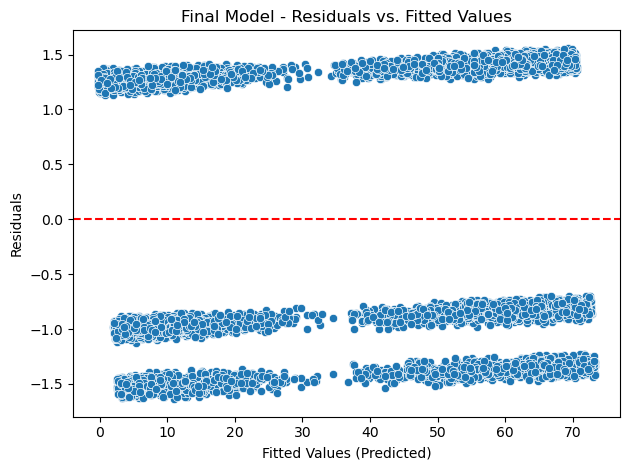

In [58]:
# Scatter plot of residuals vs fitted values for final model

sns.scatterplot(x=final_model.fittedvalues, y=final_model.resid)
plt.axhline(y=0, color="red", linestyle="--")  # Add a horizontal line at 0
plt.title("Final Model - Residuals vs. Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

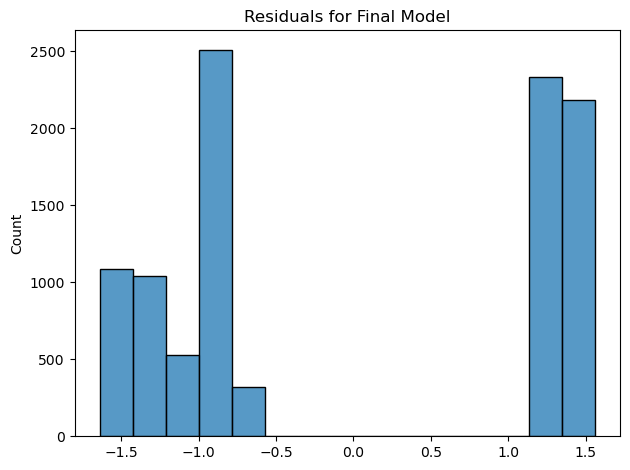

In [59]:
# Histogram of residuals for final model

sns.histplot(final_model.resid)
plt.title("Residuals for Final Model")
plt.tight_layout()
plt.show()

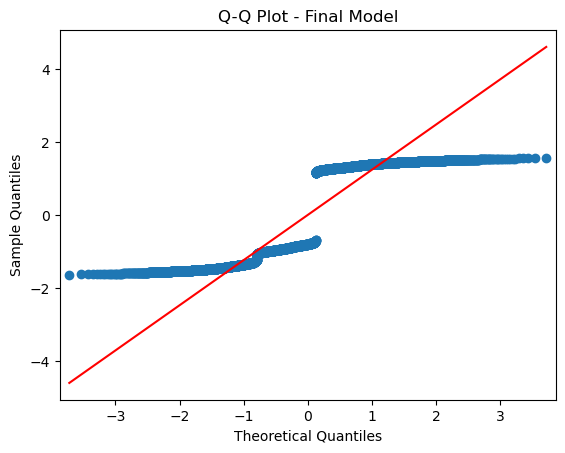

In [60]:
# Q-Q Plot for Final Model
sm.qqplot(final_model.resid, line='s')
plt.title("Q-Q Plot - Final Model")
plt.show()

In [61]:
# Equation for final model

# Extract the coefficients
coefficients = final_model.params

# Extract the intercept and coefficients
intercept = coefficients['const']
predictors = coefficients.index[1:]  # Exclude the intercept ('const')
coeff_values = coefficients.values[1:]  # Exclude the intercept value

# Create the formula
formula = f"Initial_days = {intercept}"
for predictor, coeff in zip(predictors, coeff_values):
    formula += f" + ({coeff:.4f}) * {predictor}"

print("Final Model Formula:")
print(formula)


Final Model Formula:
Initial_days = -21.04919073322405 + (0.0122) * TotalCharge + (-6.2640) * Initial_admin_Emergency_Admission + (-1.3221) * HighBlood + (-2.7811) * Complication_risk + (-0.8334) * Arthritis + (-0.9229) * Diabetes + (-1.1145) * Hyperlipidemia + (-1.0641) * BackPain + (-1.0339) * Anxiety + (-0.7837) * Allergic_rhinitis + (-0.7381) * Reflux_esophagitis


In [62]:
# Compare initial vs final model

# Metrics for Initial Model
initial_adj_r2 = initial_model.rsquared_adj
initial_aic = initial_model.aic
initial_bic = initial_model.bic
initial_mse = np.mean(initial_model.resid**2)

# Metrics for Final Model
final_adj_r2 = final_model.rsquared_adj
final_aic = final_model.aic
final_bic = final_model.bic
final_mse = np.mean(final_model.resid**2)

# Create a comparison DataFrame
metrics_comparison = pd.DataFrame({
    "Metric": ["Adjusted R²", "AIC", "BIC", "MSE"],
    "Initial Model": [initial_adj_r2, initial_aic, initial_bic, initial_mse],
    "Final Model": [final_adj_r2, final_aic, final_bic, final_mse]
})

print(metrics_comparison)


        Metric  Initial Model   Final Model
0  Adjusted R²       0.997783      0.997784
1          AIC   32694.805926  32669.769304
2          BIC   32925.536818  32756.293389
3          MSE       1.529902      1.532193


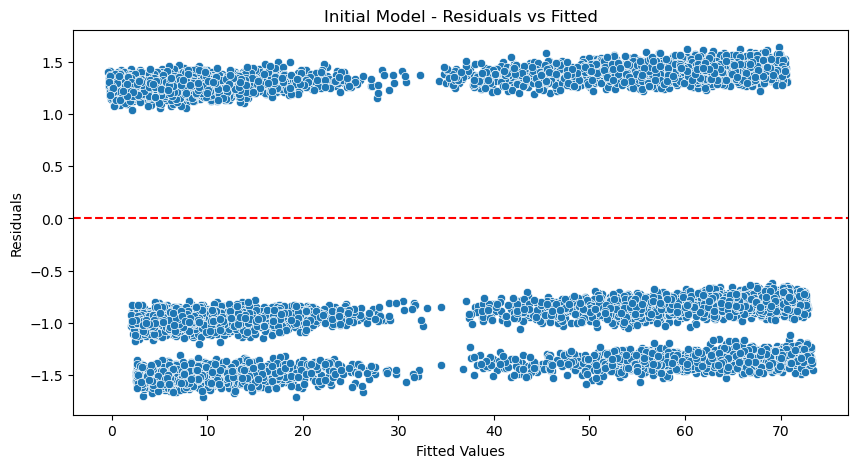

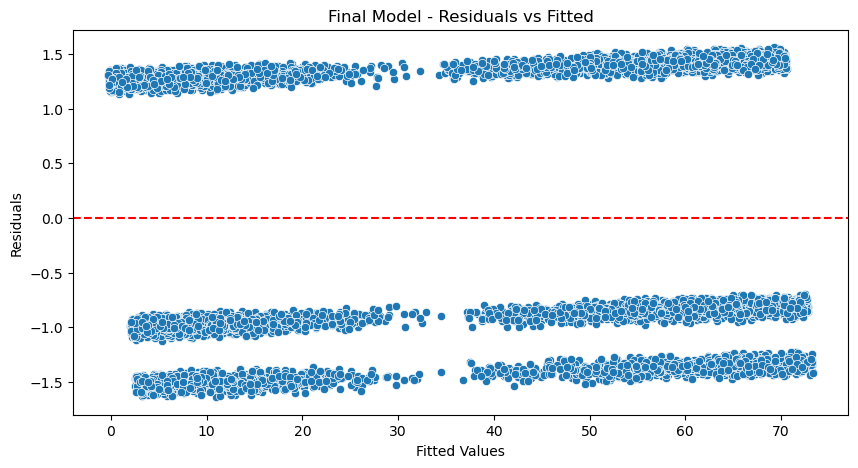

In [63]:
# Initial vs final residual scatter plot

# Initial Model Residual Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=initial_model.fittedvalues, y=initial_model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title("Initial Model - Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

# Final Model Residual Plot
plt.figure(figsize=(10, 5))
sns.scatterplot(x=final_model.fittedvalues, y=final_model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.title("Final Model - Residuals vs Fitted")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

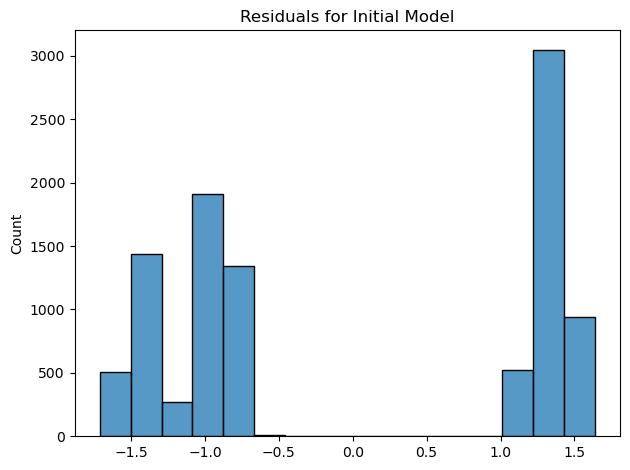

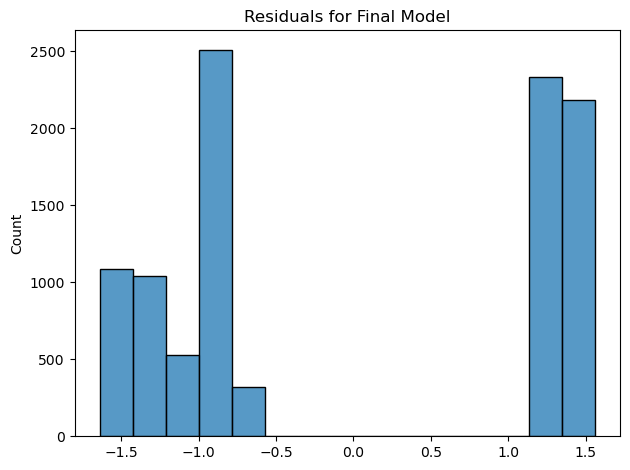

In [64]:
# Initial vs Final Residual histogram

# Initial Model Residual Histogram
sns.histplot(initial_model.resid)
plt.title("Residuals for Initial Model")
plt.tight_layout()
plt.show()


# Final Model Residual Histogram
sns.histplot(final_model.resid)
plt.title("Residuals for Final Model")
plt.tight_layout()
plt.show()

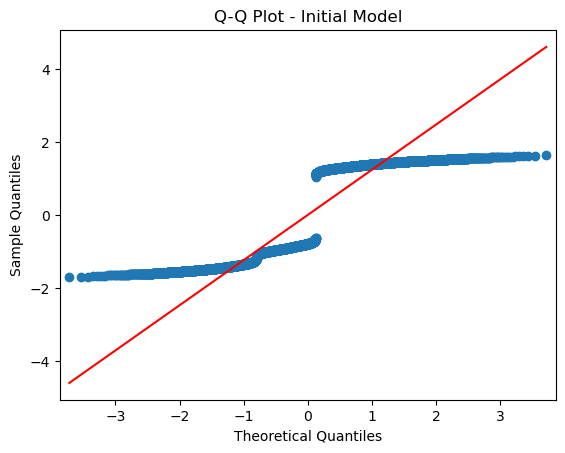

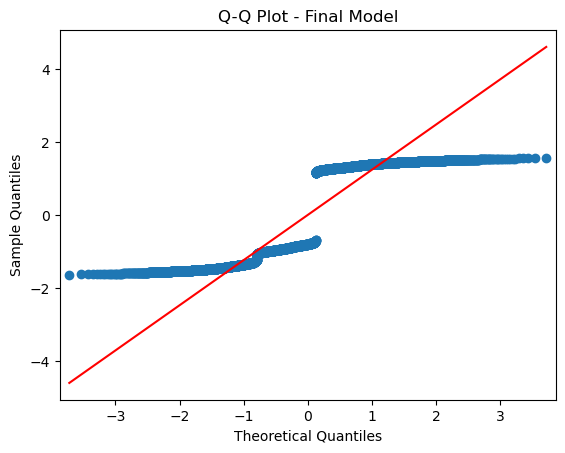

In [129]:
# Q-Q Plot for Initial Model
sm.qqplot(initial_model.resid, line='s')
plt.title("Q-Q Plot - Initial Model")
plt.show()

# Q-Q Plot for Final Model
sm.qqplot(final_model.resid, line='s')
plt.title("Q-Q Plot - Final Model")
plt.show()

In [133]:
# Save cleaned csv file
df.to_csv('updated_medical.csv')